<a href="https://colab.research.google.com/github/einstein27/visualization_python/blob/main/Plotly_samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install chart_studio

In [ ]:
# IMPORT
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

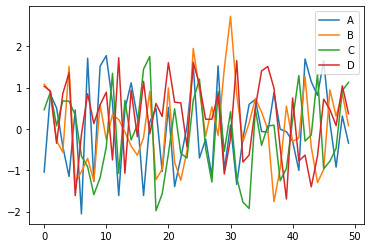

In [ ]:
# BASICS

# Create a dataframe using a NumPy array that is 50 by 4
arr_1 = np.random.randn(50, 4)
df_1 = pd.DataFrame(arr_1, columns=['A','B','C','D'])

# Compare old plots to a Plotly interactive plot
# You can save as PNG, Zoom, Pan, Turn off & on Data and more

df_1.plot()



In [ ]:
import os
import datetime as dt
#import pandas_datareader as web
import pandas_datareader as pdr
start = dt.datetime(2018,1,1)
end_date = dt.datetime.now()

#df1 = web.DataReader('GOOGL', 'yahoo', start, end)
#df2 = web.DataReader('AAPL', 'yahoo', start, end)

#df_stocks = df1.join(df2)
#f = web.DataReader('^DJI', 'stooq')

import requests 

token1 = '6def79739d59d2d0e9793e2947149c7802d824e8'
url = "https://api.tiingo.com/tiingo/daily/{}/prices?startDate=2010-01-03&endDate={}&format=csv&token={}".format('SPY',end_date,token1)
r = requests.get(url)


In [ ]:
data = r.text.split('\n',)

df =pd.DataFrame(data)


In [ ]:
df=df.iloc[:,0].str.split(",",13,expand=True)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1,2010-01-04,113.33,113.39,111.51,112.37,118857369,91.0365460671784,91.0847433032503,89.5745632396635,90.2653902900277,118857369,0.0,1.0
2,2010-01-05,113.63,113.68,112.85,113.26,111519230,91.277532247538,91.3176966109313,90.6509681786031,90.9803159584278,111519230,0.0,1.0
3,2010-01-06,113.71,113.99,113.43,113.52,116017127,91.3417952289672,91.5667156639695,91.116874793965,91.1891706480728,116017127,0.0,1.0
4,2010-01-07,114.19,114.33,113.18,113.5,130502017,91.7273731175426,91.8398333350437,90.9160529769986,91.1731049027155,130502017,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2814,2021-03-09,387.17,389.91,381.7299,385.85,113633556,387.17,389.91,381.7299,385.85,113633556,0.0,1.0
2815,2021-03-10,389.58,391.4,388.1702,389.69,109899410,389.58,391.4,388.1702,389.69,109899410,0.0,1.0
2816,2021-03-11,393.53,395.65,391.74,392.23,86245040,393.53,395.65,391.74,392.23,86245040,0.0,1.0
2817,2021-03-12,394.06,394.21,391.2,392.07,64653565,394.06,394.21,391.2,392.07,64653565,0.0,1.0


In [ ]:
data

In [ ]:
# Allows us to create graph objects for making more customized plots
import plotly.graph_objects as go

# Use included Google price data to make one plot
df_stocks = px.data.stocks()
px.line(df_stocks, x='date', y='GOOG', labels={'x':'Date', 'y':'Price'})


In [ ]:
# Make multiple line plots
px.line(df_stocks, x='date', y=['GOOG','AAPL'], labels={'x':'Date', 'y':'Price'},
       title='Apple Vs. Google')

# Create a figure to which I'll add plots
fig = go.Figure()
# You can pull individual columns of data from the dataset and use markers or not
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AAPL, 
                        mode='lines', name='Apple'))
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.AMZN, 
                        mode='lines+markers', name='Amazon'))
# You can create custom lines (Dashes : dash, dot, dashdot)
fig.add_trace(go.Scatter(x=df_stocks.date, y=df_stocks.GOOG, 
                        mode='lines+markers', name='Google',
                        line=dict(color='firebrick', width=2, dash='dashdot')))
# Further style the figure
# fig.update_layout(title='Stock Price Data 2018 - 2020',
#                    xaxis_title='Price', yaxis_title='Date')

# Go crazy styling the figure
fig.update_layout(
    # Shows gray line without grid, styling fonts, linewidths and more
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    # Turn off everything on y axis
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=False,
        showticklabels=False,
    ),
    autosize=False,
    margin=dict(
        autoexpand=False,
        l=100,
        r=20,
        t=110,
    ),
    showlegend=False,
    plot_bgcolor='white'
)